# Austin Animal Shelter Analysis

## Context

The Austin Animal Center is the largest no-kill animal shelter in the United States that provides care and shelter to over 18,000 animals each year. As part of the AAC's efforts to help and care for animals in need, the organization makes available its accumulated data and statistics as part of the city of Austin's Open Data Initiative.

## Data

The data contains intakes and outcomes of animals entering the Austin Animal Center from the beginning of October 2013 to the present day.

## Analysis

- What are the most common reasons for intake?
- What are the most common breeds per species?
- What are the most common or average ages of animals taken in?
- What were the reasons the animal was put down?
- Percantages of adoption vs. transfer

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# %matplotlib inline

# Open, Read and Save CVS to Variable, then fill in empy cells with 'unknown'
# Intakes
intakes = pd.read_csv('aac_intakes.csv', index_col=0, encoding = "ISO-8859-1")
intakes.fillna('unknown', inplace=True)

# Outcomes
outcomes = pd.read_csv('aac_outcomes.csv', index_col=0, encoding = "ISO-8859-1")
outcomes.fillna('unknown', inplace=True)

# Intakes and Outcomes
in_out = pd.read_csv('aac_intakes_outcomes.csv', index_col=0, encoding = "ISO-8859-1")
in_out.fillna('unknown', inplace=True)

# Let's Focus on Intakes First
intakes.head()

,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
age_upon_intake,,,,,,,,,,,
8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,unknown,Intact Female
4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


# Making the Data Easier to Work With

Well, I'm not a fan of how this is filled out. There's too many strings with too many variations so popping them into data sets to compare won't be fun. I can't really see if a dog is a mix since mixes vary by having both breeds listed or a single breed with the word 'mix' thrown in there. Then the ages are everywhere...

First thing's first though, I'd like to divvy up the animals and focus on sorting the most common animal type first.

In [2]:
# Sum up each unique value in the dataset and then store it in a dictionary for access.
total_by_species = intakes['animal_type'].value_counts().to_dict()

# Variables that contain the totals of each, the over all totals, and the categories.
num_results = []
total_animals = len(intakes['animal_type'])
labels = ['Dog', 'Cat', 'Other', 'Bird', 'Livestock']

# Iterating through the dictionary to populate the total number results of each type.
for x in total_by_species:
    num_results.append(total_by_species[x])

# Creating a new Dataset that only contains the animal types and their sum.
total_df = pd.DataFrame({"Total": num_results}, index=labels)

# Getting the percentage of the animal totals and adding it to the aformentioned dataset
total_df['%'] = round(((total_df['Total'] / total_animals) * 100), 2)
total_df

,Total,%
Dog,45743,57.05
Cat,29659,36.99
Other,4434,5.53
Bird,342,0.43
Livestock,9,0.01


# Doggone Shame

Looks like dogs make up a bit over half of all animals taken in and everything else makes up the other half. Alright.

In [3]:
# Make a new DataFrame where only the dogs are listed.
dog_df = intakes.loc[intakes['animal_type'] == 'Dog'].copy()
# Lets make the others' for later use...
cat_df = intakes.loc[intakes['animal_type'] == 'Cat'].copy()
other_df = intakes.loc[intakes['animal_type'] == 'Other'].copy()
bird_df = intakes.loc[intakes['animal_type'] == 'Bird'].copy()
livestock_df = intakes.loc[intakes['animal_type'] == 'Livestock'].copy()

dog_df.head()

,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
age_upon_intake,,,,,,,,,,,
8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male
2 years,A708452,Dog,Labrador Retriever Mix,Black/White,2015-07-30T14:37:00.000,2015-07-30T14:37:00.000,Austin (TX),Normal,Public Assist,Mumble,Intact Male


### Sniffing out more details

Well, there's a lot of things that can make up a dog. I'd like to know a few more things about the dogs at AAC.

- Their ages: Whether they were a puppy, an adult, or an elder.
- Their sexes.
- Their spay/neutered status.
- Their breed.

Tricky thing is that dogs mature at different rates depending on breeds so I'll just throw ballpark estimates.
Small dogs typically mature between 9-12 months, while large breeds can take up to two years.

I'll leave it as anything:
    - Under 1 year will be a puppy.
    - Between 1 and 2 years will be young.
    - Between 3 to 8 years will be an adult.
    - Over 8 years, let's call them a senior.
    
The category 'age_upon_intake' will need to be dug through. Anything with 'years' moved to adult, and without will be a puppy.

In [4]:
def getAges(data):
    ages = []
    years = []
    months = []
    lists = [years, months]
    # Iterate through the indexes (that are strings with the format of n year(s))
    for x in data.index:
        # Split the string
        age = x.split()
        # Add it to the list
        ages.append(age)
    # Now we have a list of of lists, where the first variable is a number and the second a time measurement.
    for i in ages:
        # The substrings of the second item dictate where to put the number
        if 'year' in i[1]:
            ageList = [int(i[0]), 0]
            for y, z in enumerate(ageList):
                lists[y].append(ageList[y])
        elif 'month' in i[1]:
            ageList = [0, int(i[0])]
            for y, z in enumerate(ageList):
                lists[y].append(ageList[y])
        elif ('week' in i[1]) or ('day' in i[1]):
            ageList = [0, '< 1']
            for y, z in enumerate(ageList):
                lists[y].append(ageList[y])
        else:
            ageList = ['unknown', 'unknown', 'unknown', 'unknown']
            for y, z in enumerate(ageList):
                lists[y].append(ageList[y])
    data['years'] = years
    data['months'] = months
    return

In [5]:
# Add Stage Category : Puppy (=0), Young (< 2), Adult (> 2 and < 8), or Senior (> 8)

def getLifeStage(data):
    stage = []
    for x in data['years']:
        if x == 0:
            stage.append('baby')
        elif x <= 2:
            stage.append('young')
        elif (x > 2) and (x <= 8):
            stage.append('adult')
        elif x > 8:
            stage.append('senior')
        else:
            stage.append('unknown')
    data['stage'] = stage
    return

In [6]:
def getBreeds(data):
    breeds1 = []
    breeds2 = []
    isMixed = []
    
    for x in data['breed']:
        splitX = x.split("/")
        breed1 = ''
        breed2 = ''
        if len(splitX) >= 2:
            breed1 = splitX[0].lower()
            breed2 = splitX[1].lower()
            isMixed.append(1)
        else:
            breed1 = splitX[0].lower()
            breed2 = 'none'
            if "mix" in breed1:
                splitAgain = breed1.split(' mix')
                breed1 = splitAgain[0]
                breed2 = 'mix'
                isMixed.append(1)
            else:
                isMixed.append(0)

        breeds1.append(breed1)
        breeds2.append(breed2)
    
    data['breed1'] = breeds1
    data['breed2'] = breeds2
    data['is_Mix'] = isMixed
    return

In [7]:
def getColors(data):
    colors1 = []
    colors2 = []
    
    for x in data['color']:
        colorSplit = x.split('/')
        color1 = ''
        color2 = ''
        if len(colorSplit) == 2:
            color1 = colorSplit[0].lower()
            color2 = colorSplit[1].lower()
        else:
            color1 = colorSplit[0].lower()
            color2 = 'none'
        
        colors1.append(color1)
        colors2.append(color2)
    
    data['color1'] = colors1
    data['color2'] = colors2
    
    return

In [8]:
def getSexes(data):
    genders = []
    fixed = []
    
    # Iterate through the strings found in the sex column
    for x in data['sex_upon_intake']:
        y = str(x)
        word_list = y.split()
        if len(word_list) == 2:
            status = word_list[0].lower()
            gender = word_list[1].lower()
            genders.append(gender)
            if status == 'intact':
                fixed.append(0)
            else:
                fixed.append(1)
        else:
            genders.append('unknown')
            fixed.append(0)
    data['sex'] = genders
    data['fixed'] = fixed
    return

In [9]:
def fixIndex(data):
    data = data.drop(['sex_upon_intake', 'breed', 'color'], axis=1).set_index('animal_id')
    return data

In [10]:
def formatInfo(data):
    getAges(data)
    getBreeds(data)
    getColors(data)
    getLifeStage(data)
    getSexes(data)
    return

formatInfo(dog_df)
dog_df = fixIndex(dog_df)

In [11]:
formatInfo(cat_df)
cat_df = fixIndex(cat_df)
formatInfo(other_df)
other_df = fixIndex(other_df)
formatInfo(bird_df)
bird_df = fixIndex(bird_df)
formatInfo(livestock_df)
livestock_df = fixIndex(livestock_df)
formatInfo(intakes)
intakes = fixIndex(intakes)

### Now that everyone is formatted to the best of my abilities, I can compare animals.

Sex, Spay/Neutered, Color, Age, Age Category, and Breed can be plotted better now.
Animal_ID was also made the index to cross reference between the other documents better, as its a unique value.
I'll have to see how I can determine location better, and I don't know what's up with the two date times...

In [12]:
outcomes = outcomes.set_index('animal_id')
in_out = in_out.set_index('animal_id_outcome')
in_out_all = pd.merge(in_out, intakes, left_index=True, right_index=True)
in_out_all = in_out_all[['animal_id_intake', 'date_of_birth', 'name', 'animal_type_x', 'age_upon_intake_(years)', 'age_upon_intake_(days)', 'age_upon_outcome_(years)', 'age_upon_outcome_(days)', 'stage', 'breed1', 'breed2', 'is_Mix', 'sex', 'fixed', 'color1', 'color2', 'intake_type_x', 'intake_condition_x', 'intake_month', 'intake_weekday', 'intake_year', 'intake_monthyear', 'outcome_type', 'outcome_month', 'outcome_subtype', 'outcome_weekday', 'outcome_year', 'outcome_monthyear', 'time_in_shelter_days']]

In [13]:
in_out_all[['fixed', 'is_Mix']] = in_out_all[['fixed', 'is_Mix']].astype(bool)

# Rates of Intakes by Year, Species, Sexes, and Age-Groups

In [14]:
intakes_per_year = in_out_all.intake_year.value_counts().reset_index(name='Total')
intakes_per_year = intakes_per_year.rename(columns={'index': 'Year'})
intakes_per_year_species = in_out_all.groupby(['animal_type_x', 'intake_year']).size().reset_index(name='Total')
intakes_per_year_sex = in_out_all.groupby(['sex', 'intake_year']).size().reset_index(name='Total')
intakes_per_year_age = in_out_all.groupby(['stage', 'intake_year']).size().reset_index(name='Total')
intakes_per_year_sex = intakes_per_year_sex.rename(columns={'intake_year': 'Year'})
intakes_per_year_age = intakes_per_year_age.rename(columns={'intake_year': 'Year'})
intakes_per_year_species = intakes_per_year_species.rename(columns={'intake_year': 'Year'})

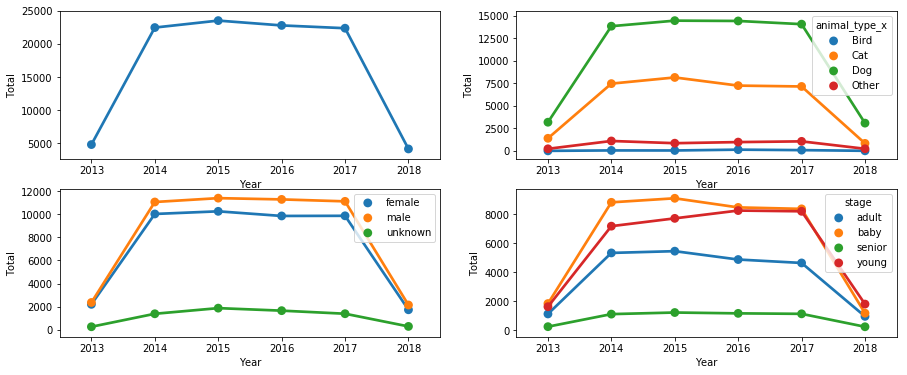

In [15]:
f, axes = plt.subplots(2, 2, figsize=(15,6))
axes = axes.flatten()
sns.pointplot(x='Year', y='Total', data=intakes_per_year, ax=axes[0])
sns.pointplot(x='Year', y='Total', data=intakes_per_year_species, hue='animal_type_x', ax=axes[1])
sns.pointplot(x='Year', y='Total', data=intakes_per_year_sex, hue='sex', ax=axes[2])
sns.pointplot(x='Year', y='Total', data=intakes_per_year_age, hue='stage', ax=axes[3])
axes[2].legend(loc='upper right')

# Percentages of Animals by Category

In [16]:
def getTotals(data, group):
    result = data.groupby([group]).size().reset_index(name='Total')
    return result

def plotPie(data, label, title):
    capLabel = []
    for x in data[label]:
        cap = x.capitalize()
        capLabel.append(cap)
    return data.plot.pie(y='Total', labels=capLabel, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, figsize=(8, 8)), plt.title(title), plt.legend(loc='lower right')

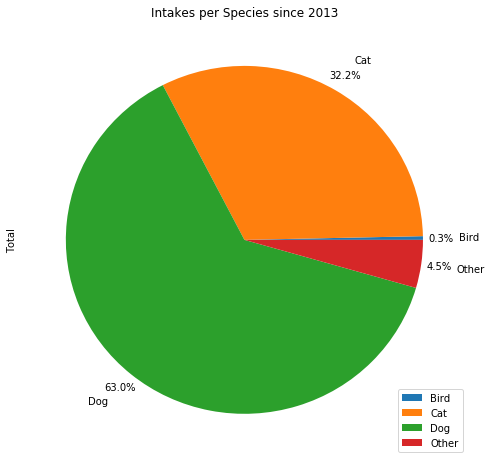

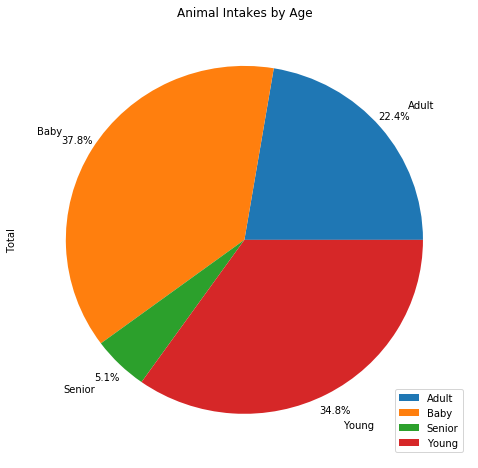

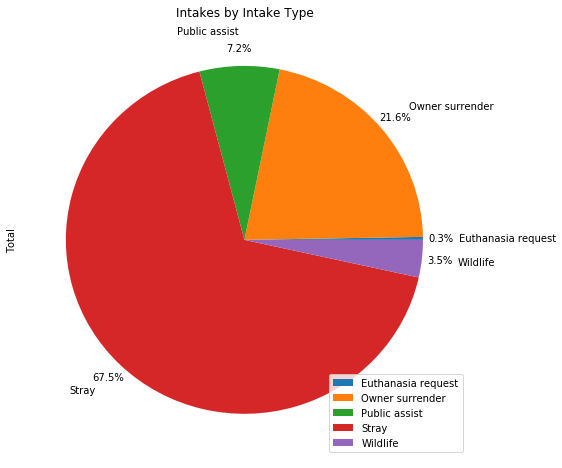

In [17]:
intakes_per_species = getTotals(in_out_all, 'animal_type_x')
plotPie(intakes_per_species, 'animal_type_x', 'Intakes per Species since 2013')

intakes_by_age = getTotals(in_out_all, 'stage')
plotPie(intakes_by_age, 'stage', 'Animal Intakes by Age')

intakes_by_int_type = getTotals(in_out_all, 'intake_type_x')
plotPie(intakes_by_int_type, 'intake_type_x', 'Intakes by Intake Type')

outcomes_by_out_type = getTotals(in_out_all, 'outcome_type')

In [18]:
outcomes_by_out_type = outcomes_by_out_type.sort_values(by='Total', ascending=False)

Text(0.5,1,'Outcome Types of all Intakes')

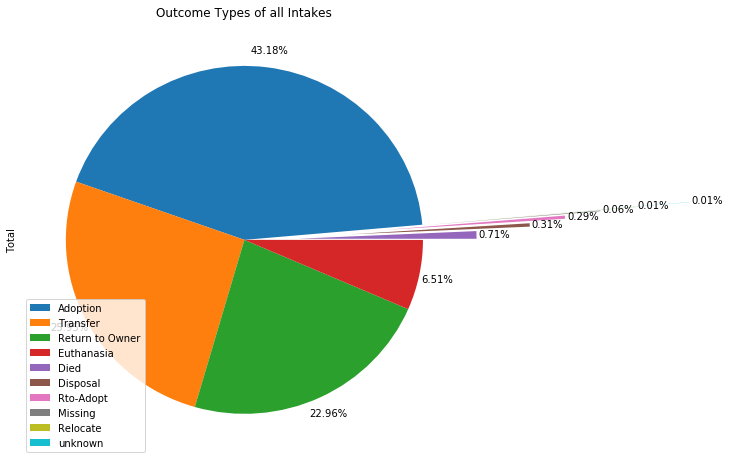

In [19]:
explode = (0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 0.8, 1.0, 1.2, 1.5)
outcomes_by_out_type.plot.pie(y='Total', labels=['','','','', '', '', '', '', '',''], figsize=(8, 8), explode=explode, labeldistance=1, autopct='%1.2f%%', pctdistance=1.1, startangle=5)
plt.legend(labels=outcomes_by_out_type['outcome_type'], loc='lower left')
plt.title('Outcome Types of all Intakes')

Text(0.5,1,'Outcome of all Intakes without Owners')

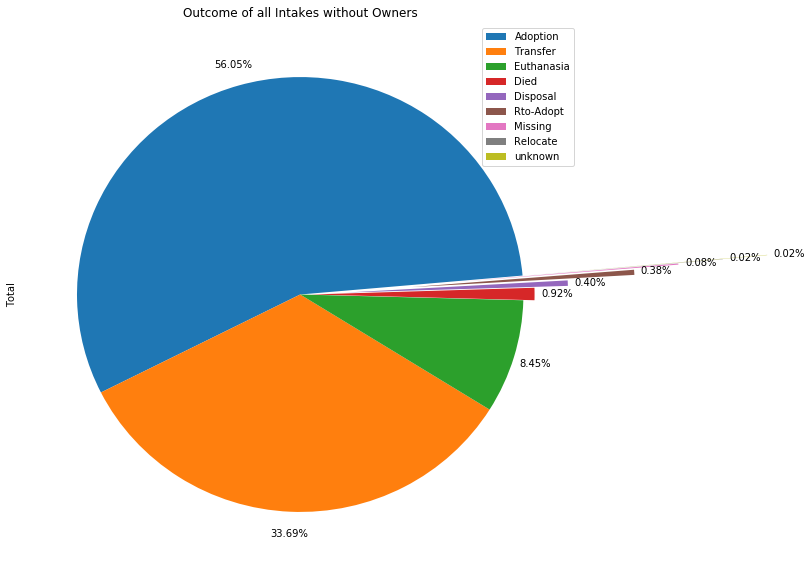

In [20]:
in_out_no_owner = in_out_all[in_out_all['outcome_type'] != 'Return to Owner']
in_out_no_owner_totals = getTotals(in_out_no_owner, 'outcome_type')
in_out_no_owner_totals = in_out_no_owner_totals.sort_values(by='Total', ascending=False)
in_out_no_owner_totals.plot.pie(y='Total', figsize=(10,10), labels=['', '', '', '', '', '', '', '', ''], explode=(0, 0, 0, 0.05, 0.2, 0.5, 0.7, 0.9, 1.1), labeldistance=1, autopct='%1.2f%%', pctdistance=1.1, startangle=5)
plt.legend(labels=in_out_no_owner_totals['outcome_type'])
plt.title('Outcome of all Intakes without Owners')

[Text(0,0.5,'Total'), Text(0.5,0,'Reason')]

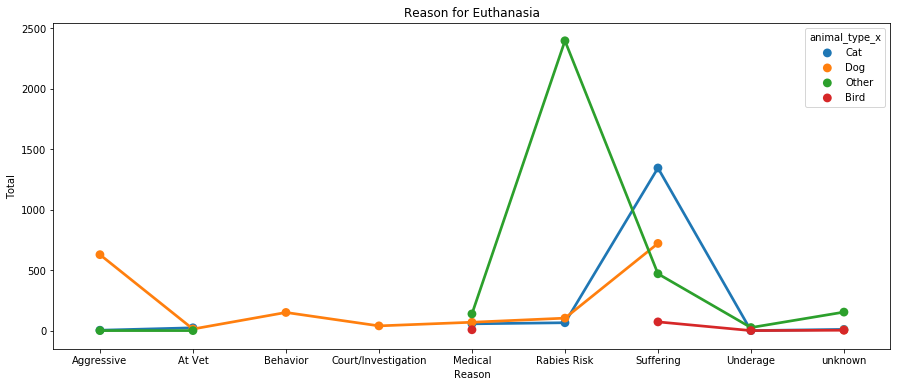

In [21]:
euth_outcomes = in_out_all[in_out_all['outcome_type'] == 'Euthanasia'].copy()
euth_totals = euth_outcomes.groupby(['outcome_subtype', 'animal_type_x']).size().reset_index(name='Total')
f, axes = plt.subplots(1, 1, figsize=(15,6))
ax1 = sns.pointplot(y='Total', x='outcome_subtype', hue='animal_type_x', data=euth_totals, labels=euth_totals['outcome_subtype'])
plt.title('Reason for Euthanasia')
ax1.set(xlabel='Reason', ylabel='Total')

# Aww, this is sad...

A little over half of the animals have gotten adopted, and quite a few dogs get put down for aggression. ):
I don't wanna analyze this no more...